In [79]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt



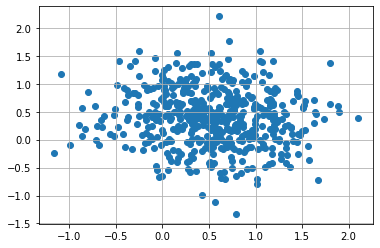

In [80]:
random.seed(123)
x, y = make_blobs(n_samples=500, centers=3, cluster_std=.5, center_box=(0, 1))

plt.scatter(x[:,0], x[:,1])
plt.grid(True)
plt.show()

In [81]:
model = OPTICS().fit(x)
print(model)

scores = model.core_distances_

thresh = quantile(scores, .98)
print(thresh) 

OPTICS()
0.3854083748555367


In [82]:
index = where(scores >= thresh)
values = x[index]
print(values)

[[-0.79934775  0.85160032]
 [ 0.5686595  -1.11315522]
 [ 0.42214812 -0.99238797]
 [ 0.71129065  1.76545206]
 [-1.16720499 -0.24228844]
 [ 1.79943423  1.37953238]
 [-1.08886756  1.18067542]
 [ 0.79497865 -1.32938817]
 [ 1.67617486 -0.72638355]
 [ 0.60401694  2.20889607]]


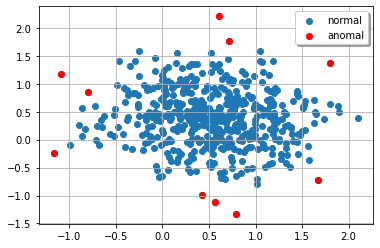

In [83]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.legend(("normal", "anomal"), loc="best", fancybox=True, shadow=True)
plt.grid(True)
plt.show()

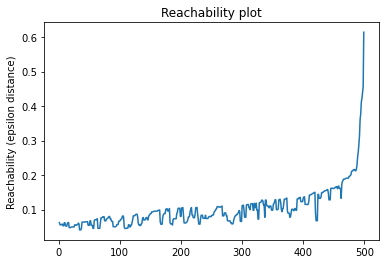

In [84]:
# Generate reachability plot
reachability = model.reachability_[model.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.ylabel('Reachability (epsilon distance)')
plt.show()